# Overview / Genel Bakış
**ENG**
In this project, I endeavored to tackle the pressing issue of obesity prediction through a machine learning lens. The aim was to create a robust predictive model that leverages a variety of algorithms to accurately classify individuals' obesity levels based on a series of health-related features. The dataset, sourced from a Kaggle competition, provided a rich foundation for feature engineering, analysis, and model training.

**TR**
Bu projede, obezite tahmini sorununu makine öğrenimi perspektifinden ele almayı amaçladım. Bir dizi sağlıkla ilgili özelliklere dayanarak bireylerin obezite seviyelerini doğru bir şekilde sınıflandırabilen güçlü bir tahmin modeli oluşturmak hedeflendi. Kaggle yarışmasından elde edilen veri seti, özellik mühendisliği, analiz ve model eğitimi için zengin bir temel sundu.

# Data Engineering and Analysis / Veri Mühendisliği ve Analizi
**ENG**
The initial phase involved importing essential libraries and loading the dataset for preprocessing. I performed comprehensive feature engineering to enhance the dataset, which included creating new features such as BMI categories, age groups, and a healthy lifestyle score. Notably, I addressed discrepancies in the test data by aligning categorical values with the training set.

**TR**
İlk aşama, temel kütüphaneleri içe aktarmak ve veri setini ön işleme için yüklemekle başladı. Veri setini iyileştirmek için kapsamlı özellik mühendisliği gerçekleştirildi; bu, BMI kategorileri, yaş grupları ve sağlıklı yaşam puanı gibi yeni özelliklerin oluşturulmasını içerdi. Test verilerindeki tutarsızlıklar, eğitim setiyle kategorik değerleri hizalayarak giderildi.

# Visualization for Insights / İçgörü için Görselleştirme
**ENG**
Data visualization played a crucial role in this study, offering a window into the patterns and relationships within the data. Various plots, such as BMI distribution and the impact of active transportation on obesity status, were crafted using libraries like Matplotlib and Seaborn. These visualizations not only provided insights but also guided the feature engineering process.

**TR**
Bu çalışmada veri görselleştirme, veriler içindeki desenleri ve ilişkileri gösteren önemli bir rol oynadı. BMI dağılımı ve aktif ulaşımın obezite durumu üzerindeki etkisi gibi çeşitli grafikler, Matplotlib ve Seaborn kütüphaneleri kullanılarak hazırlandı. Bu görselleştirmeler sadece içgörü sağlamakla kalmadı, aynı zamanda özellik mühendisliği sürecini yönlendirdi.

# Model Development with Optuna Optimization / Optuna Optimizasyonu ile Model Geliştirme
**ENG**
I employed Optuna for hyperparameter tuning to determine the optimal settings for several classifiers, including CatBoost, XGBoost, LightGBM, Gradient Boosting, and Random Forest. The models were trained and evaluated individually, with accuracy as the primary metric. I found that the CatBoost and XGBoost models, when combined, yielded the most promising results.

**TR**
Birçok sınıflandırıcı için optimal ayarları belirlemek amacıyla hiperparametre ayarlaması için Optuna kullandım. Modeller tek tek eğitildi ve değerlendirildi, ana metrik olarak doğruluk kullanıldı. CatBoost ve XGBoost modellerinin birleşimi en umut verici sonuçları verdi.

# Ensemble Learning with Voting Classifier / Oylama Sınıflandırıcısı ile Ansambl Öğrenme
**ENG**
Seeking to amplify the predictive power, I utilized a Voting Classifier that harnessed the strengths of the individual models. The soft voting mechanism was applied to combine predictions, leading to a noteworthy improvement in the model's accuracy.

**TR**
Tahmin gücünü artırmak amacıyla, bireysel modellerin güçlerini kullanan bir Oylama Sınıflandırıcısı kullandım. Tahminleri birleştirmek için yumuşak oylama mekanizması uygulandı, bu da modelin doğruluğunda dikkate değer bir iyileşme sağladı.

# Conclusion and Submission / Sonuç ve Gönderim
**ENG**
The final step of this project was to predict obesity levels on the test set using the Voting Classifier I developed. The predictions were carefully formatted and saved into a submission file, which achieved a score of **0.91184** in the Kaggle competition, showcasing the performance of our model.

This journey through the project has been a testament to the efficacy of ensemble methods in machine learning and their capacity to refine predictions in complex scenarios like obesity prediction. The experience has been an enriching demonstration of the synergy between data science and healthcare, providing valuable insights into the practical application of advanced analytics in real-world health challenges.

**TR**
Bu projenin final adımı, geliştirdiğim Oylama Sınıflandırıcısını kullanarak test setindeki obezite seviyelerini tahmin etmekti. Tahminler özenle biçimlendirildi ve Kaggle yarışmasında **0.91184** puan alarak modelimizin performansını sergileyen bir gönderim dosyasına kaydedildi.

Bu proje yolculuğu, obezite tahmini gibi karmaşık senaryolarda tahminleri rafine etme kapasitesi ile makine öğrenimi ansambl yöntemlerinin etkinliğine bir tanıklıktır. Sağlıkla ilgili gerçek dünya zorluğuna uygulanan makine öğreniminin ayrıntılarına dair bu deneyim, veri bilimi ve sağlık bilimleri arasındaki sinerjiyi zengin bir şekilde göstermiş ve ileri analitik uygulamalarının gerçek sağlık sorunlarına nasıl değerli içgörüler sağlayabileceğini ortaya koymuştur.

# Importing Libraries / Kütüphanelerin İçeri Aktarılması

In [14]:
import pandas as pd
import numpy as np
import optuna
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings('ignore')

# Loading the Data / Verilerin Yüklenmesi

In [15]:
data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv", index_col="id")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv", index_col="id")
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

# Feature Engineering / Özellik Mühendisliği
- **ENG**/ We will create new features with the features we have. **TR**/ Elimizdeki özellikler ile yeni özellikler oluşturacağız.
- **ENG**/ The "CALC" column in the test dataset contains an "Always" category that is not present in the training dataset. To address this issue, I will merge the "Always" category with the "Frequently" category.   **TR**/ Test veri setinde "CALC" stünunun içersinde eğitim veri setinin içersinde olmayan "Always" kategorisi bulunuyor. Sorunun önüne geçebilmek adına "Always" kategorisini "Frequently" kategorisine dahil edeceğim. 

In [16]:
def new_features(df):
    
    """ BMI (Body Mass Index) Hesaplama ve Kategorilendirme """
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese"])

    """ Yaş Kategorileri """
    df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, np.inf], labels=['Teen', 'Young_Adult', 'Adult', 'Senior'])

    """ Sağlıklı Yaşam Skoru """
    df['Healthy_Lifestyle_Score'] = (df['FCVC'] + df['NCP'] + df['CH2O'] + df['FAF']) / 4

    """ Aktif ve Pasif Ulaşım Modları """
    df['Active_Transport'] = df['MTRANS'].apply(lambda x: 1 if x in ['Walking', 'Bike'] else 0)
    df['Passive_Transport'] = df['MTRANS'].apply(lambda x: 1 if x in ['Automobile', 'Motorbike'] else 0)

    """ Toplam Su Tüketimi """
    df['Total_Water_Intake'] = df['CH2O'] * df['FAF']
    
    return df

In [17]:
data = new_features(data)
test_data = new_features(test_data)

In [18]:
test_data["CALC"].replace({"Always": "Frequently"}, inplace=True)

# Data Visualization / Veri Görselleştirilmesi

## Visualizing the Distribution of the Target Variable / Hedef Değişkenin Dağılımını Görselleştirme
- **ENG**/ We can show the proportion of each class in the dataset by plotting a bar graph that shows the distribution of the target variable. **TR**/ Hedef değişkenin dağılımını gösteren bir bar grafiği çizerek her sınıfın veri setindeki oranını gösterebiliriz.

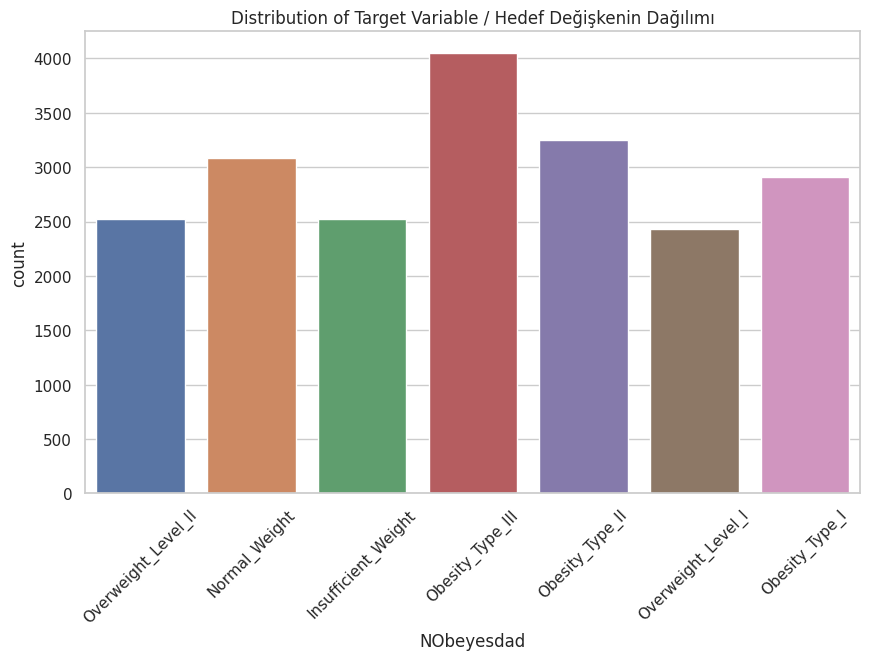

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=data)
plt.title('Distribution of Target Variable / Hedef Değişkenin Dağılımı')
plt.xticks(rotation=45)
plt.show()

## Distribution of BMI Categories / BMI Kategorilerinin Dağılımı
- **ENG**/ By examining the distribution of BMI categories, we can observe the body mass index status of the participants. **TR**/ BMI kategorilerinin dağılımını inceleyerek, katılımcıların vücut kitle indeksi durumlarını gözlemleyebiliriz.

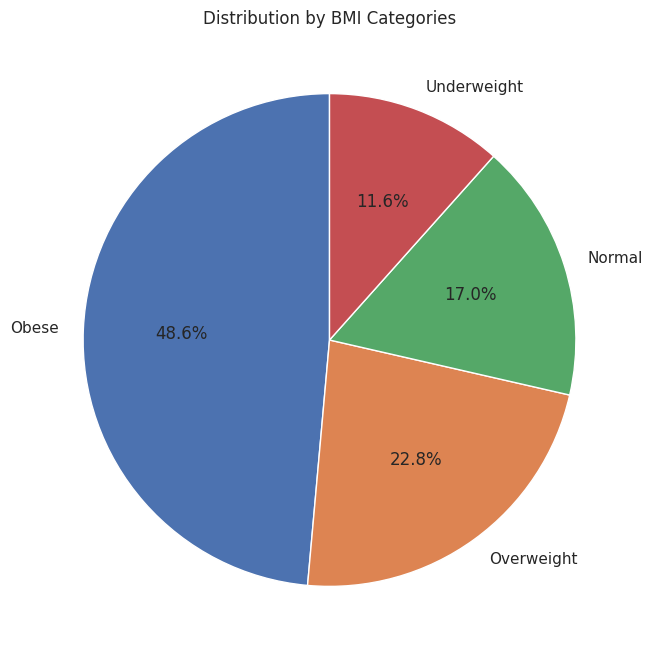

In [20]:
bmi_categories = data["BMI_Category"]
bmi_counts = bmi_categories.value_counts()
plt.figure(figsize=(8, 8))
bmi_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution by BMI Categories')
plt.ylabel('')
plt.show()

## The Relationship Between Age and BMI / Yaş ve BMI İlişkisi
- **ENG**/ We can use a scatter plot to examine the relationship between age and BMI. This can show the effect of age on BMI. **TR**/ Yaş ile BMI arasındaki ilişkiyi incelemek için bir scatter plot kullanabiliriz. Bu, yaşın BMI üzerindeki etkisini gösterebiliriz.

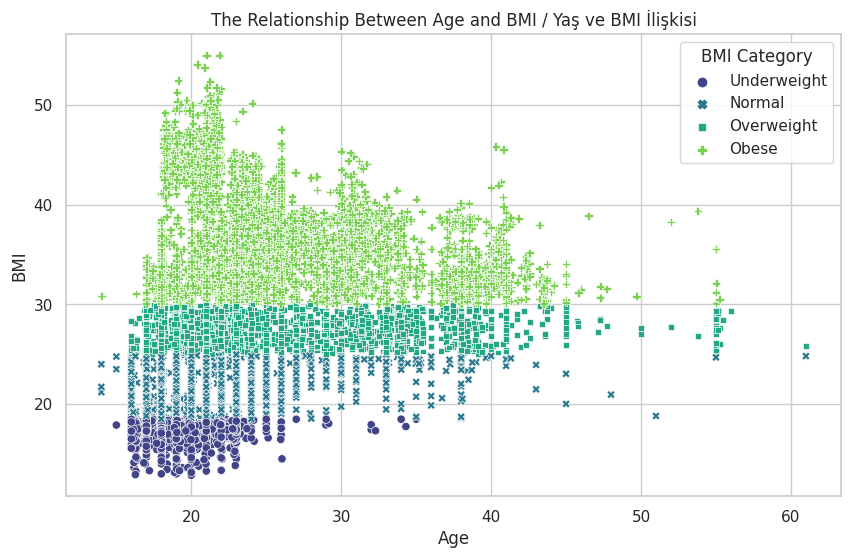

In [21]:
# Yaş ve BMI İlişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='BMI', hue='BMI_Category', style='BMI_Category', palette='viridis')
plt.title('The Relationship Between Age and BMI / Yaş ve BMI İlişkisi')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='BMI Category')
plt.show()

## Healthy Life Score Distribution / Sağlıklı Yaşam Skoru Dağılımı
- **ENG**/ We can plot a histogram to examine the distribution of participants' wellness scores. **TR**/ Katılımcıların sağlıklı yaşam skorlarının dağılımını incelemek için bir histogram çizebiliriz.

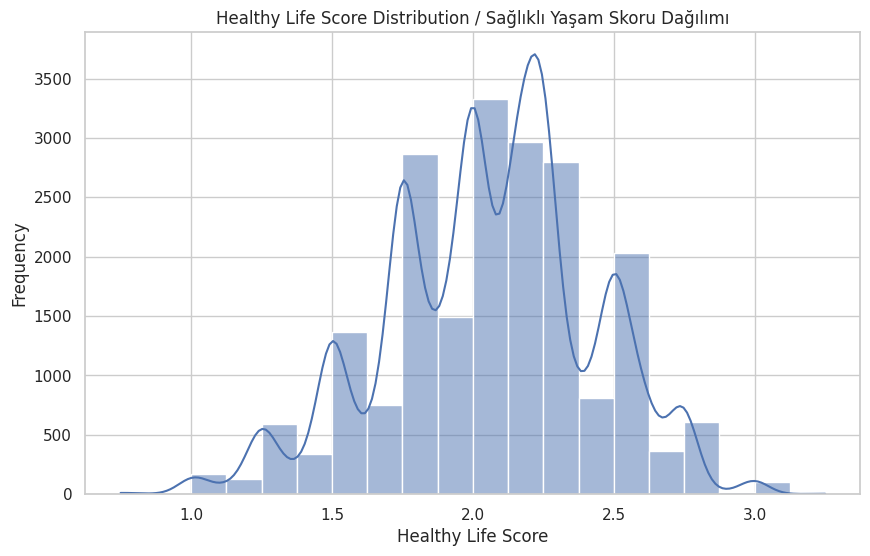

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Healthy_Lifestyle_Score'], kde=True, bins=20)
plt.title('Healthy Life Score Distribution / Sağlıklı Yaşam Skoru Dağılımı')
plt.xlabel('Healthy Life Score')
plt.ylabel('Frequency')
plt.show()

## Transportation Modes and Obesity Status / Ulaşım Modları ve Obezite Durumu
- **ENG**/ We can draw a box plot to show the relationship between transportation modes (active and passive) and obesity status. **TR**/ Ulaşım modları (aktif ve pasif) ile obezite durumu arasındaki ilişkiyi göstermek için bir box plot çizebiliriz.

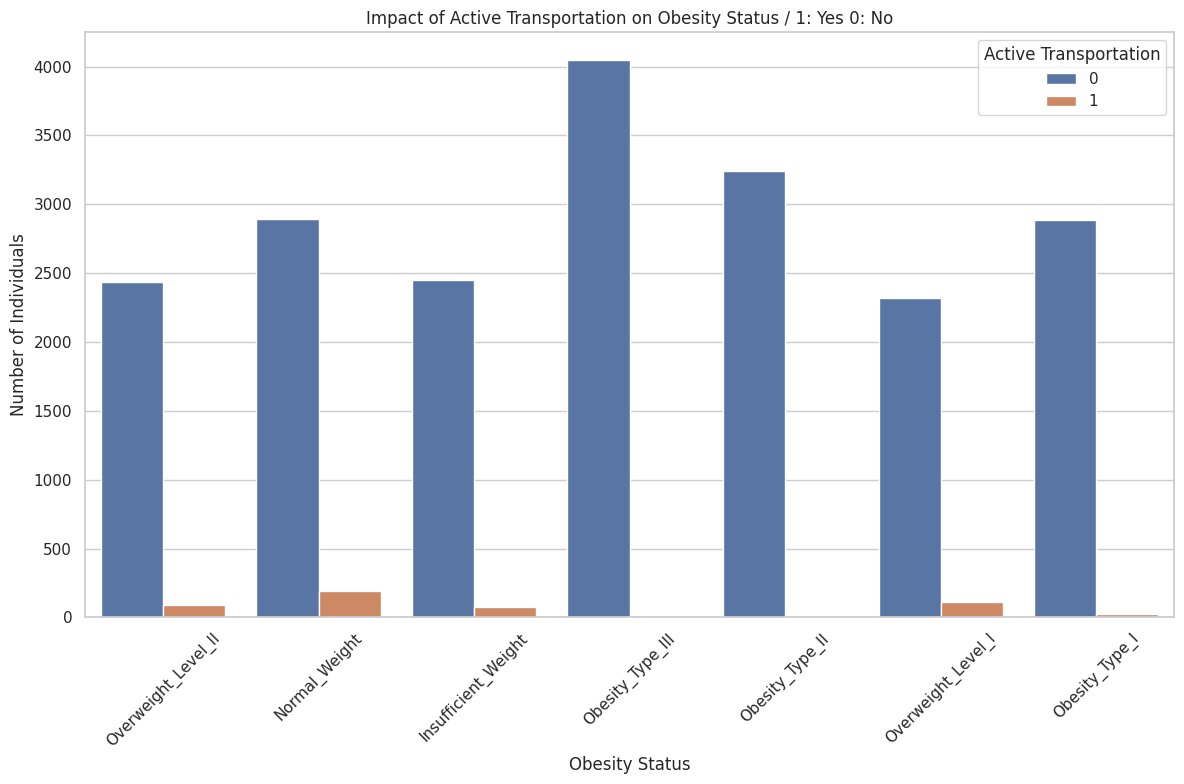

In [23]:
sns.set(style="whitegrid")

# Aktif Ulaşım Modunun Obezite Durumuna Etkisi
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='NObeyesdad', hue='Active_Transport')
plt.title('Impact of Active Transportation on Obesity Status / 1: Yes 0: No')
plt.xlabel('Obesity Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Active Transportation', loc='upper right')
plt.tight_layout()
plt.show()

## Age Distribution Histogram / Yaş Dağılımı Histogramı

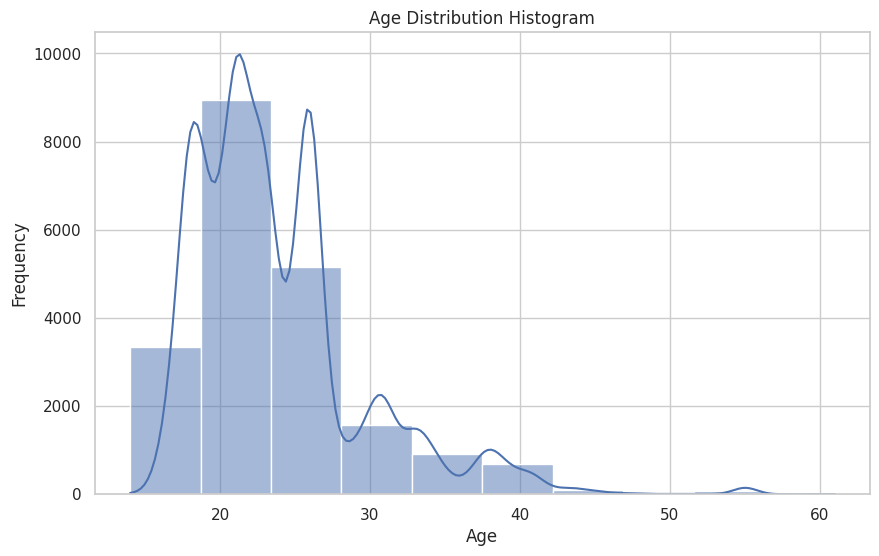

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Distribution by Transportation Modes / Ulaşım Türlerine Göre Dağılım

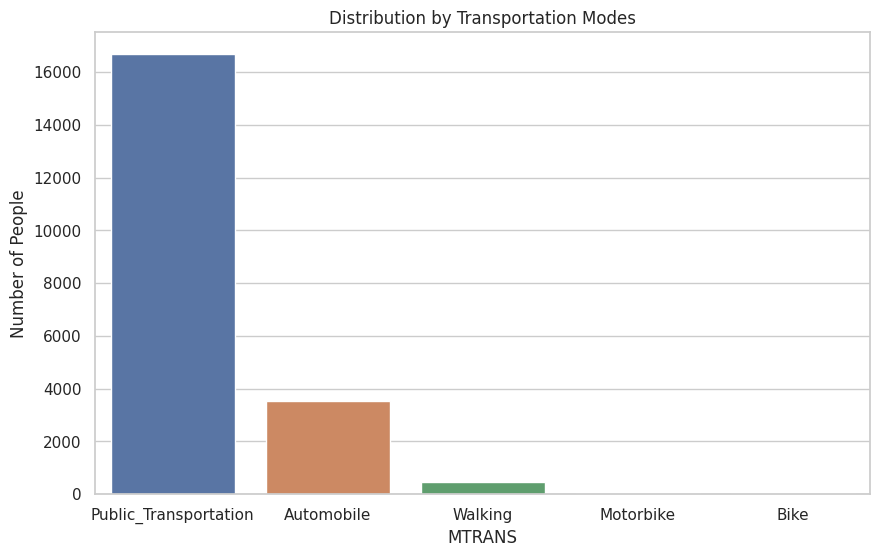

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MTRANS', data=data)
plt.title('Distribution by Transportation Modes')
plt.ylabel('Number of People')
plt.show()

# Label Encoding and Get Dummies
- **ENG**/ We will convert our target variable to numeric.  **TR**/ Hedef değişkenimizi numerik hale çevireceğiz
- **ENG**/ We will convert categorical columns with less than 2 data with label encoder, and columns with more than 2 data with get dummies. **TR**/ İçersinde 2'den az veri bulunan kategorik stünları label encoder ile 2 den fazla veri bulunan stünları da get dummies ile dönüştüştüreceğiz.

In [26]:
data["NObeyesdad"].replace({
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6,
}, inplace=True)

In [27]:
def transform_categorical_values(df):
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    label_columns = df[categorical_columns].nunique()[df[categorical_columns].nunique() == 2].index.tolist()
    df[label_columns] = df[label_columns].apply(lambda col: le.fit_transform(col))
    
    one_hot_columns = df[categorical_columns].nunique()[df[categorical_columns].nunique() > 2].index.tolist()
    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)
    
    return df

In [28]:
data = transform_categorical_values(data)
test_data = transform_categorical_values(test_data)

# Eğitim ve Test Seti Oluşturma
- **ENG**/ I will exclude the target variable data from the data dataset and assign the training data to x, then I will only assign the dependent variable to y only. **TR**/ Hedef değişkeni data veri seti dışında tutup eğitim verilerini x'e atayacağım ardından sadece bağımlı değişkeni sadece y'ye atayacağım.
- **ENG**/ With Train Test Split, I will determine test_size and random_state and separate the training and test sets. **TR**/ Train Test Split ile test_size ve random_state'i belirleyip eğitim ve test setlerini ayıracağım.

In [30]:
x = data.drop("NObeyesdad", axis=1)
y = data["NObeyesdad"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Checking the size of data / Verilerin boyutlarını kontrol etme
print(f"Train Data Shape: {x_train.shape}")
print(f"Test Data Shape: {x_test.shape}")

Train Data Shape: (16606, 33)
Test Data Shape: (4152, 33)


# OPTUNA
- **ENG**/ I will try to find the most suitable parameters for CATBOOST, XGBOOST, LIGHTGBM, GRADIENTBOOSTING, RANDOMFOREST models with Optuna. **TR**/ Optuna ile CATBOOST, XGBOOST, LIGHTGBM, GRADIENTBOOSTING, RANDOMFOREST modelleri için en uygun parametreleri bulmaya çalışacağım.

## 1. CatBoostClassifier

In [32]:
#def objective(trial):
#    # Hiperparametre aralıklarını tanımlama
#    param = {
#        'iterations': trial.suggest_int('iterations', 100, 2000),
#        'depth': trial.suggest_int('depth', 2, 10),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10),
#        'border_count': trial.suggest_int('border_count', 32, 255),
#        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#        'random_strength': trial.suggest_float('random_strength', 0.001, 1.0),
#        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
#        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20)
#    }
#
#    # 'max_leaves' sadece 'Lossguide' grow_policy için geçerli
#    if param['grow_policy'] == 'Lossguide':
#        param['max_leaves'] = trial.suggest_int('max_leaves', 31, 64)
#
#    # CatBoostClassifier modelini oluşturma ve eğitme
#    model = CatBoostClassifier(**param, verbose=0, early_stopping_rounds=100)
#    model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=0)
#
#    # Modelin doğruluğunu hesaplama
#    preds = model.predict(x_test)
#    accuracy = accuracy_score(y_test, preds)
#    return accuracy
#
## Optuna study nesnesi oluşturma ve optimizasyon başlatma
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=2005)

#### **ENG**/ I have reached the following results after parameter search with Optuna for CatBoost: **TR**/ Optuna ile CatBoost parametre aramasının sonucunda şunlara eriştim:
- [I 2024-02-22 05:48:58,400] *Trial 871 finished with value:* **0.9135356454720617** *and parameters:* {'iterations': 1355, 'depth': 5, 'learning_rate': 0.1096384174794031, 'l2_leaf_reg': 5.010224281972051, 'border_count': 240, 'bagging_temperature': 0.10565271312223717, 'random_strength': 0.3295302174116903, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 16}. **Best is trial 871 with value: 0.9135356454720617.**

## 2. XGBClassifier

In [33]:
#def objective_xgboost(trial):
#    # Hiperparametre aralıklarını tanımlama
#    param = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
#        'max_depth': trial.suggest_int('max_depth', 3, 20),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#        'subsample': trial.suggest_float('subsample', 0.20, 1.0),
#        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.20, 1.0),
#        'gamma': trial.suggest_float('gamma', 1e-10, 1.0),
#        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 5),
#        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 5),
#        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
#        
#
#    }
#
#    # XGBoost modelini oluşturma ve eğitme
#    model = XGBClassifier(**param, early_stopping_rounds=200, random_state=42)
#    model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=0)
#
#    # Modelin doğruluğunu hesaplama
#    preds = model.predict(x_test)
#    accuracy = accuracy_score(y_test, preds)
#    return accuracy
#
## Optuna study nesnesi oluşturma ve optimizasyon başlatma
#study_xgboost = optuna.create_study(direction='maximize')
#study_xgboost.optimize(objective_xgboost, n_trials=2005)

#### **ENG**/ I have reached the following results after parameter search with Optuna for XGBoost: **TR**/ Optuna ile XGBoost parametre aramasının sonucunda şunlara eriştim:
- [I 2024-02-22 14:27:03,497] *Trial 1033 finished with value:* **0.914980732177264** *and parameters:* {'n_estimators': 1653, 'max_depth': 3, 'learning_rate': 0.08346083239445595, 'subsample': 0.9473612065571799, 'colsample_bytree': 0.2727334724076542, 'gamma': 0.035093546773850515, 'reg_alpha': 2.0084596983174867, 'reg_lambda': 4.700706962671846, 'min_child_weight': 1}. **Best is trial 1033 with value: 0.914980732177264.**

## 3. LGBMClassifier

In [34]:
#def objective_lightgbm(trial):
#    param = {
#        'objective': 'multiclass',
#        'metric': 'multi_logloss',
#        'num_class': len(set(y_train)),  # Sınıf sayısını belirtin
#        'verbosity': -1,
#        'boosting_type': 'gbdt',
#        'lambda_l1': trial.suggest_float('lambda_l1', 1e-10, 20.0, log=True),
#        'lambda_l2': trial.suggest_float('lambda_l2', 1e-10, 20.0, log=True),
#        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
#        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
#        'bagging_freq': trial.suggest_int('bagging_freq', 0.001, 10),
#        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
#        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
#        'max_depth': trial.suggest_int('max_depth', -1, 100),  # -1 means no limit
#        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0, 50),
#        'min_child_weight': trial.suggest_float('min_child_weight', 1e-7, 1e-5, log=True),
#        'min_sum_hessian_in_leaf': trial.suggest_float('min_sum_hessian_in_leaf', 1e-8, 1e-5, log=True)
#    }
#
#    # Create and train LightGBM model
#    model = LGBMClassifier(**param, early_stopping_rounds=100, random_state=42, verbose=0)
#    model.fit(x_train, y_train, eval_set=[(x_test, y_test)])
#
#    # Evaluate model performance
#    preds = model.predict(x_test)
#    accuracy = accuracy_score(y_test, preds)
#    return accuracy
#
## Optuna study nesnesi oluşturma ve optimizasyon başlatma
#study_lightgbm = optuna.create_study(direction='maximize')
#study_lightgbm.optimize(objective_lightgbm, n_trials=4000)

#### **ENG**/ I have reached the following results after parameter search with Optuna for LGBMClassifier: **TR**/ Optuna ile LGBMClassifier parametre aramasının sonucunda şunlara eriştim:
- [I 2024-02-22 13:37:47,196] *Trial 3253 finished with value:* **0.9123314065510597** *and parameters:* {'lambda_l1': 0.0034407365453225976, 'lambda_l2': 0.14618731005541508, 'num_leaves': 19, 'feature_fraction': 0.40031517145679507, 'bagging_fraction': 0.6394939715840073, 'bagging_freq': 10, 'min_child_samples': 1, 'learning_rate': 0.10868460654536086, 'max_depth': 88, 'min_gain_to_split': 0.015546065137711812, 'min_child_weight': 2.6133446037573905e-07, 'min_sum_hessian_in_leaf': 6.347168996577988e-06}. **Best is trial 3253 with value: 0.9123314065510597.**

## 4. GradientBoostingClassifier

In [35]:
#def objective_gradient_boosting(trial):
#    param = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
#        'max_depth': trial.suggest_int('max_depth', 3, 15),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
#        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#        'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
#        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 50),
#        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#        'validation_fraction': trial.suggest_float('validation_fraction', 0.1, 0.3),
#        'n_iter_no_change': trial.suggest_int('n_iter_no_change', 5, 20),
#        'tol': trial.suggest_float('tol', 1e-5, 1e-3, log=True),
#        'random_state': 42
#    }
#
#    # GradientBoostingClassifier modelini oluşturma ve eğitme
#    model = GradientBoostingClassifier(**param)
#    model.fit(x_train, y_train)
#
#    # Modelin doğruluğunu hesaplama
#    preds = model.predict(x_test)
#    accuracy = accuracy_score(y_test, preds)
#    return accuracy
#
## Optuna study nesnesi oluşturma ve optimizasyon başlatma
#study_gradient_boosting = optuna.create_study(direction='maximize')
#study_gradient_boosting.optimize(objective_gradient_boosting, n_trials=2005)

#### **ENG**/ I have reached the following results after parameter search with Optuna for GradientBoostingClassifier: **TR**/ Optuna ile GradientBoostingClassifier parametre aramasının sonucunda şunlara eriştim:
- [I 2024-02-22 04:21:59,956] *Trial 220 finished with value:* **0.9104046242774566** *and parameters:* {'n_estimators': 653, 'max_depth': 7, 'learning_rate': 0.01630624786154065, 'subsample': 0.9267674351619599, 'min_samples_split': 83, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'validation_fraction': 0.15505642008587056, 'n_iter_no_change': 7, 'tol': 1.1030772570725336e-05}. **Best is trial 220 with value: 0.9104046242774566.**

## 5. RandomForestClassifier

In [36]:
#from sklearn.ensemble import RandomForestClassifier
#
#def objective_random_forest(trial):
#    param = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
#        'max_depth': trial.suggest_int('max_depth', 5, 100),
#        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
#        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]),
#        'random_state': 42
#    }
#
#    # RandomForest modelini oluşturma ve eğitme
#    model = RandomForestClassifier(**param)
#    model.fit(x_train, y_train)
#
#    # Modelin doğruluğunu hesaplama
#    preds = model.predict(x_test)
#    accuracy = accuracy_score(y_test, preds)
#    return accuracy
#
## Optuna study nesnesi oluşturma ve optimizasyon başlatma
#study_random_forest = optuna.create_study(direction='maximize')
#study_random_forest.optimize(objective_random_forest, n_trials=1000)

#### **ENG**/ I have reached the following results after parameter search with Optuna for RandomForestClassifier: **TR**/ Optuna ile RandomForestClassifier parametre aramasının sonucunda şunlara eriştim:

- [I 2024-02-22 08:38:06,226] *Trial 468 finished with value:* **0.901252408477842** *and parameters:* {'n_estimators': 1596, 'max_depth': 92, 'min_samples_split': 12, 'min_samples_leaf': 1, 'bootstrap': False, 'class_weight': 'balanced'}. **Best is trial 468 with value: 0.901252408477842.**

## Creating models with the best parameters I found / Bulduğum en iyi parametreler ile modelleri oluşturma

In [37]:
catboost_model = CatBoostClassifier(
    iterations=1819, depth=5, learning_rate=0.1014969073551741, l2_leaf_reg=5.34593664307217, 
    border_count=164, bagging_temperature=0.8408771489965642, random_strength=0.7008891194758375, grow_policy='Depthwise',
    min_data_in_leaf=16, verbose=0)

xgboost_model = XGBClassifier(
    n_estimators=1653, max_depth=3, learning_rate=0.08346083239445595, subsample=0.9473612065571799, 
    colsample_bytree=0.2727334724076542, gamma=0.035093546773850515, reg_alpha=2.0084596983174867, 
    reg_lambda=4.700706962671846, min_child_weight= 1, verbosity=0)

lightgbm_model = LGBMClassifier(
    lambda_l1=0.0034407365453225976, lambda_l2=0.14618731005541508, num_leaves=19, 
    feature_fraction=0.40031517145679507, bagging_fraction=0.6394939715840073, bagging_freq=10, 
    min_child_samples=1, learning_rate=0.10868460654536086, max_depth=88, min_gain_to_split=0.015546065137711812, 
    min_child_weight=2.6133446037573905e-07, min_sum_hessian_in_leaf=6.347168996577988e-06, verbose=-1)

gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=653, max_depth=7, learning_rate=0.01630624786154065, subsample=0.9267674351619599, 
    min_samples_split=83, min_samples_leaf=10, max_features='sqrt',validation_fraction=0.15505642008587056, n_iter_no_change=7,
    tol=1.1030772570725336e-05)

random_forest_model = RandomForestClassifier(
    n_estimators=930, max_depth=326, min_samples_split=7, min_samples_leaf=1, bootstrap=True, class_weight=None
)

## Evaluating the Models We Created One by One / Oluşturduğumuz Modelleri Tek Tek Değerlendirme

In [38]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

models = [
    ('CatBoost', catboost_model),
    ('XGBoost', xgboost_model),
    ('LightGBM', lightgbm_model),
    ('Gradient Boosting', gradient_boosting_model),
    ('Random Forest',random_forest_model)
]

for name, model in models:
    accuracy = train_and_evaluate(model, x_train, y_train, x_test, y_test)
    print(f"{name} Model Accuracy: {accuracy:.4f}")

CatBoost Model Accuracy: 0.9116
XGBoost Model Accuracy: 0.9104
LightGBM Model Accuracy: 0.9061
Gradient Boosting Model Accuracy: 0.9053
Random Forest Model Accuracy: 0.8988


# Voting Classifier / Oylama Sınıflandırıcısı
- **ENG**/ I will try to increase the score further by combining the power of the models we have created using a Voting Classifier. **TR**/ Oluşturduğumuz modellerin gücünü Voting Classifier ile birleştirerek skoru daha da arttırmaya çalışacağım.

In [39]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        #('lightgbm', lightgbm_model),
        #('random_forest', random_forest_model),
        #('gradient_boosting', gradient_boosting_model)
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7c9d0dce10f0>),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.2727334724076542,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            g...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.08346083239445595,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1653, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [40]:
#catboost+xgboost+lightgbm+gradient_boosting                SOFT = 0.9097
#catboost+xgboost+lightgbm+gradient_boosting+randomforest   SOFT = 0.9092
#catboost+xgboost+lightgbm+randomforest                     SOFT = 0.9094
#catboost+xgboost+lightgbm                                  SOFT = 0.9111
#catboost+xgboost                                           SOFT = 0.9135
#catboost                                                   SOFT = 0.9116
#catboost+lightgbm                                          SOFT = 0.9109
#xgboost+lightgbm                                           SOFT = 0.9098
#xgboost                                                    SOFT = 0.9104
#catboost+xgboost+gradient_boosting                         SOFT = 0.9094
#catboost+xgboost+randomforest                              SOFT = 0.9106
#catboost+randomforest                                      SOFT = 0.9109
#catboost+lightgbm+randomforest                             SOFT = 0.9075

accuracy = voting_clf.score(x_test, y_test) 
print(f"Voting Ensemble Model Accuracy: {accuracy:.4f}")

Voting Ensemble Model Accuracy: 0.9135


#### - **ENG**/ I got the highest score with the combination of catboost and xgboost. **TR**/ En yüksek skoru catboost ve xgboost kombinasyonu ile aldım.

# Preparation of the Submission File
- **ENG**/ I'm gonna predict the test data set with the voting_clf model I created. **TR**/ Test veri setini oluşturduğum voting_clf modeli ile tahmin edeceğim.
- **ENG**/ I'm gonna convert the predicted column to the desired format. **TR**/ Tahmin edilen sütunu istenen formata dönüştüreceğim.
- **ENG**/ I will save the submission file. **TR**/ Submission dosyasını kaydedeceğim. 

In [41]:
final_preds = voting_clf.predict(test_data)

In [42]:
submission["NObeyesdad"] = final_preds

In [43]:
submission["NObeyesdad"] = submission["NObeyesdad"].replace({
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Overweight_Level_I",
    3: "Overweight_Level_II",
    4: "Obesity_Type_I",
    5: "Obesity_Type_II",
    6: "Obesity_Type_III"
})

In [44]:
submission.to_csv('submission.csv', index=False)